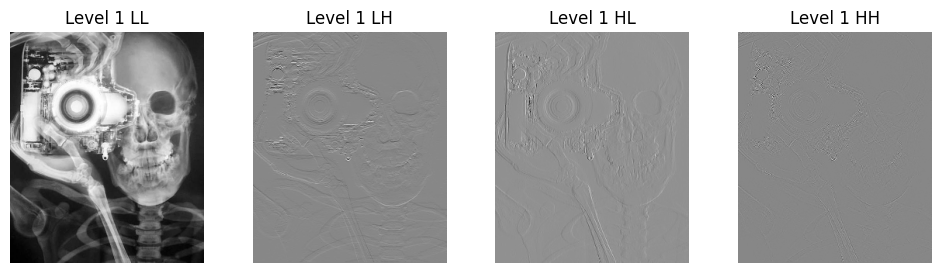

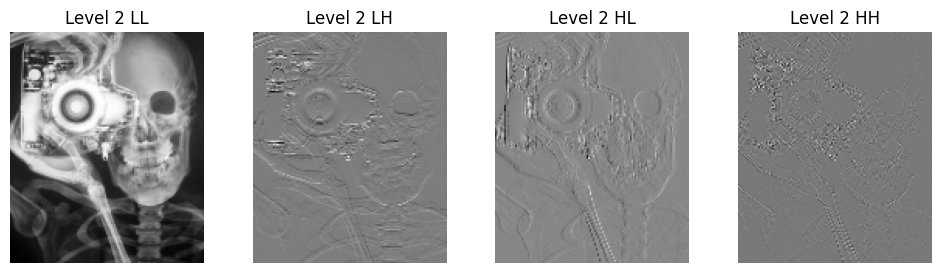

LL1: Represents coarse details (approximation of the image).
LH1: Emphasizes vertical edges (low in horizontal, high in vertical).
HL1: Emphasizes horizontal edges (high in horizontal, low in vertical).
HH1: Captures fine details like noise and sharp edges (high frequency).

Decomposing LL1 to Level 2:
LL2: Represents even more refined coarse details.
LH2: Finer vertical edges.
HL2: Finer horizontal edges.
HH2: Finer high-frequency noise and sharp details.


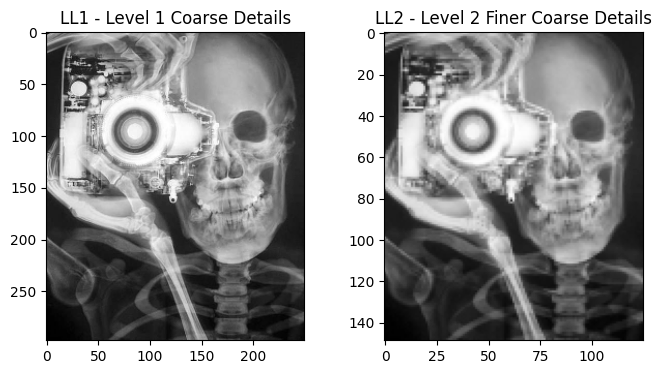


Analysis of Resolution Variation:
1. LL1 vs LL2: LL2 provides a more refined view of coarse details compared to LL1, showing more subtle variations.
2. LH1 vs LH2: LH2 highlights vertical features at a finer resolution, making subtle vertical edges more visible.
3. HL1 vs HL2: Similar refinement is observed for horizontal edges in HL2 compared to HL1.
4. HH1 vs HH2: HH2 captures finer noise and sharper details, further decomposing high-frequency content compared to HH1.


In [3]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Load the X-ray image
image = Image.open('image.png').convert('L')  # Convert image to grayscale
image_data = np.array(image)

# Function to plot the wavelet bands
def plot_wavelet_bands(coeffs, title):
    fig, ax = plt.subplots(1, 4, figsize=(12, 3))
    titles = ['LL', 'LH', 'HL', 'HH']
    for i, a in enumerate(ax):
        a.imshow(coeffs[i], cmap='gray')
        a.set_title(f'{title} {titles[i]}')
        a.axis('off')
    plt.show()

# Step 2: Apply 2D Discrete Wavelet Transform (DWT) - Level 1
coeffs_level_1 = pywt.dwt2(image_data, 'haar')
LL1, (LH1, HL1, HH1) = coeffs_level_1

# Step 3: Apply 2D DWT to LL1 (Level 2)
coeffs_level_2 = pywt.dwt2(LL1, 'haar')
LL2, (LH2, HL2, HH2) = coeffs_level_2

# Step 4: Plot the bands for Level 1
plot_wavelet_bands([LL1, LH1, HL1, HH1], "Level 1")

# Step 5: Plot the bands for Level 2
plot_wavelet_bands([LL2, LH2, HL2, HH2], "Level 2")

# Step 6: Display and Analyze Sub-Bands
# Explanation of sub-bands for Level 1
print("LL1: Represents coarse details (approximation of the image).")
print("LH1: Emphasizes vertical edges (low in horizontal, high in vertical).")
print("HL1: Emphasizes horizontal edges (high in horizontal, low in vertical).")
print("HH1: Captures fine details like noise and sharp edges (high frequency).")

# Explanation of sub-bands for Level 2
print("\nDecomposing LL1 to Level 2:")
print("LL2: Represents even more refined coarse details.")
print("LH2: Finer vertical edges.")
print("HL2: Finer horizontal edges.")
print("HH2: Finer high-frequency noise and sharp details.")

# Step 7: Compare Level 1 and Level 2 Sub-Bands (Resolution Variation Analysis)
# Plot LL1 and LL2 side by side to show resolution change
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(LL1, cmap='gray')
plt.title('LL1 - Level 1 Coarse Details')

plt.subplot(1, 2, 2)
plt.imshow(LL2, cmap='gray')
plt.title('LL2 - Level 2 Finer Coarse Details')

plt.show()

# Analysis
print("\nAnalysis of Resolution Variation:")
print("1. LL1 vs LL2: LL2 provides a more refined view of coarse details compared to LL1, showing more subtle variations.")
print("2. LH1 vs LH2: LH2 highlights vertical features at a finer resolution, making subtle vertical edges more visible.")
print("3. HL1 vs HL2: Similar refinement is observed for horizontal edges in HL2 compared to HL1.")
print("4. HH1 vs HH2: HH2 captures finer noise and sharper details, further decomposing high-frequency content compared to HH1.")
